In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [21]:
def baseline_model(dense_size, input_dim, loss_function, optimizer):
    # create model
    model = Sequential()
    model.add(Dense(dense_size, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss=loss_function, optimizer=optimizer)
    model.summary()
    return model

In [3]:
# Chargement et normalisation des données
df = pd.read_pickle('data/data.pkl')
data = df[['h2s', 'pressure', 'temperature', 'humidity', 'so2', 'h2s_ref']]
df[['h2s', 'pressure', 'temperature', 'humidity', 'so2', 'h2s_ref']] =  data.apply(pd.to_numeric, errors="coerce").apply(lambda x: (x - np.mean(x)) / (np.std(x)))
print(len(df))
df = df[pd.notnull(df).all(axis=1)] # On ne garde que les données sans NaN etc..
print(len(df))
df.head()

19445
8676


,date,h2s,pressure,temperature,humidity,n_points,so2,h2s_ref,captor
4,2016-05-23 09:15:00,1.673433,0.047316,0.996046,-1.610853,15,-0.259294,-0.709240,1303
9,2016-05-23 10:30:00,1.530588,0.202130,0.996046,-1.677224,15,-0.259294,-0.709240,1303
20,2016-05-23 13:15:00,1.637722,0.356944,0.996046,-1.809965,15,-0.259294,-0.709240,1303
25,2016-05-23 14:30:00,1.655577,0.356944,0.996046,-1.809965,15,-0.259294,-0.561424,1303
31,2016-05-23 16:00:00,1.566299,0.356944,0.996046,-1.876336,15,-0.259294,-0.709240,1303


In [4]:
def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

def dataframe_to_xy(df):
    return np.array(df[['h2s', 'pressure', 'temperature', 'humidity', 'so2']]), np.array(df['h2s_ref'])

df_train, df_test = split_dataframe(df, 0.5) 
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = dataframe_to_xy(df_train)
X_valid, y_valid = dataframe_to_xy(df_valid)
X_test, y_test = dataframe_to_xy(df_test)

In [5]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [13]:
p = 10
input_dim = 5
models_info = {
    'models': {},
    'loss_function': 'mse',
    'optimizer': 'adam',
    'name': '1 Layer: {} neurons'
}
#early_stopping = EarlyStopping(monitor='val_loss', verbose=1, mode='auto', patience=10)
tolerances = np.linspace(0, 1, 10)

for i in range(p):
    info_dict = {}

    model = baseline_model(2**(i+1), input_dim)
    history = model.fit(X_train, y_train, batch_size=5, epochs=50, validation_data=(X_valid, y_valid), callbacks=[], verbose=1)
    info_dict['loss'] = history.history['loss']
    info_dict['val_loss'] = history.history['val_loss']
    
    info_dict['score'] = model.evaluate(X_test, y_test, batch_size=5)
    y_pred = model.predict(X_test)
    acc = []
    for tol in tolerances:
        y_tol = tol*y_train.flatten()
        accur = np.sum(np.abs(y_pred.flatten() - y_test.flatten()) <= tol) / len(y_test)
        acc.append(accur)
    info_dict['accuracies'] = acc
    models_info['models'][2**(i+1)] = info_dict
models_info['optimizer'] = 'SGD'
models_info['loss_function'] = 'mse'

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 2)                 12        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train on 4338 samples, validate on 2169 samples
Epoch 1/50
4338/4338 [==============================] - 3s - loss: 0.2382 - val_loss: 0.4701
Epoch 2/50
4338/4338 [==============================] - 2s - loss: 0.2143 - val_loss: 0.4906
Epoch 3/50
4338/4338 [==============================] - 2s - loss: 0.2032 - val_loss: 0.4932
Epoch 4/50
4338/4338 [==============================] - 2s - loss: 0.1956 - val_loss: 0.4902
Epoch 5/50
4338/4338 [==============================] - 2s - loss: 0.1922 - val_loss: 0.4850
Epoch 6/50
4338/4338 [=======

Train on 4338 samples, validate on 2169 samples
Epoch 1/50
4338/4338 [==============================] - 2s - loss: 0.2166 - val_loss: 0.4923
Epoch 2/50
4338/4338 [==============================] - 2s - loss: 0.1888 - val_loss: 0.4849
Epoch 3/50
4338/4338 [==============================] - 2s - loss: 0.1830 - val_loss: 0.4456
Epoch 4/50
4338/4338 [==============================] - 2s - loss: 0.1794 - val_loss: 0.4288
Epoch 5/50
4338/4338 [==============================] - 2s - loss: 0.1765 - val_loss: 0.4115
Epoch 6/50
4338/4338 [==============================] - 2s - loss: 0.1754 - val_loss: 0.4114
Epoch 7/50
4338/4338 [==============================] - 2s - loss: 0.1745 - val_loss: 0.4272
Epoch 8/50
4338/4338 [==============================] - 2s - loss: 0.1725 - val_loss: 0.4156
Epoch 9/50
4338/4338 [==============================] - 2s - loss: 0.1719 - val_loss: 0.4162
Epoch 10/50
4338/4338 [==============================] - 2s - loss: 0.1710 - val_loss: 0.4215
Epoch 11/50
4338/4338

4338/4338 [==============================] - 2s - loss: 0.1793 - val_loss: 0.3878
Epoch 3/50
4338/4338 [==============================] - 2s - loss: 0.1759 - val_loss: 0.3787
Epoch 4/50
4338/4338 [==============================] - 2s - loss: 0.1732 - val_loss: 0.4200
Epoch 5/50
4338/4338 [==============================] - 2s - loss: 0.1676 - val_loss: 0.4133
Epoch 6/50
4338/4338 [==============================] - 2s - loss: 0.1609 - val_loss: 0.4095
Epoch 7/50
4338/4338 [==============================] - 2s - loss: 0.1604 - val_loss: 0.4442
Epoch 8/50
4338/4338 [==============================] - 2s - loss: 0.1569 - val_loss: 0.4602
Epoch 9/50
4338/4338 [==============================] - 2s - loss: 0.1533 - val_loss: 0.4605
Epoch 10/50
4338/4338 [==============================] - 2s - loss: 0.1465 - val_loss: 0.4520
Epoch 11/50
4338/4338 [==============================] - 2s - loss: 0.1484 - val_loss: 0.4678
Epoch 12/50
4338/4338 [==============================] - 2s - loss: 0.1406 - va

4338/4338 [==============================] - 2s - loss: 0.0848 - val_loss: 0.8817
Epoch 33/50
4338/4338 [==============================] - 2s - loss: 0.0815 - val_loss: 0.8717
Epoch 34/50
4338/4338 [==============================] - 2s - loss: 0.0833 - val_loss: 0.8005
Epoch 35/50
4338/4338 [==============================] - 2s - loss: 0.0810 - val_loss: 0.9280
Epoch 36/50
4338/4338 [==============================] - 2s - loss: 0.0813 - val_loss: 0.7961
Epoch 37/50
4338/4338 [==============================] - 2s - loss: 0.0817 - val_loss: 1.0672
Epoch 38/50
4338/4338 [==============================] - 2s - loss: 0.0817 - val_loss: 1.2396
Epoch 39/50
4338/4338 [==============================] - 2s - loss: 0.0805 - val_loss: 1.0773
Epoch 40/50
4338/4338 [==============================] - 3s - loss: 0.0808 - val_loss: 0.8510
Epoch 41/50
4338/4338 [==============================] - 3s - loss: 0.0796 - val_loss: 0.9126
Epoch 42/50
4338/4338 [==============================] - 2s - loss: 0.07

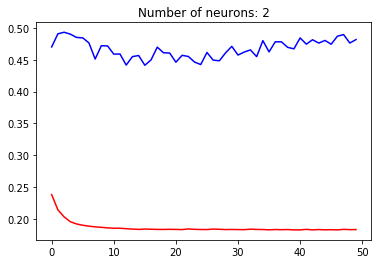

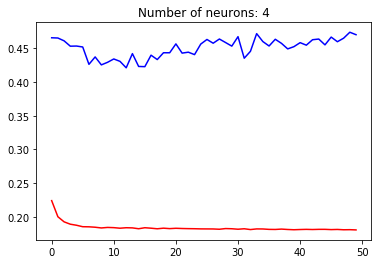

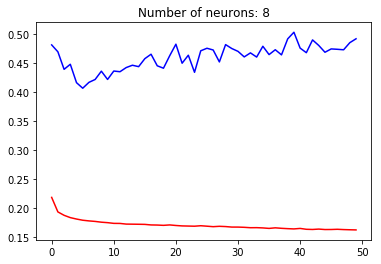

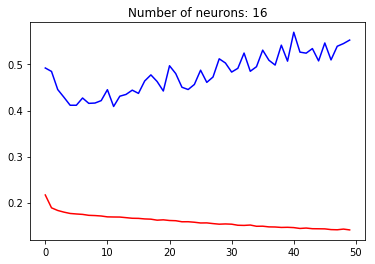

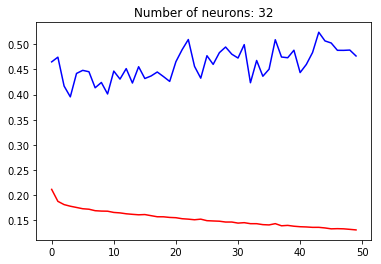

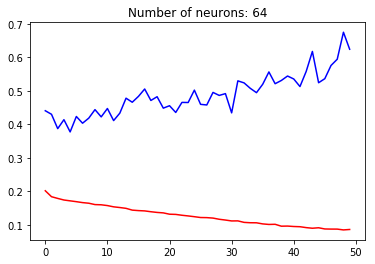

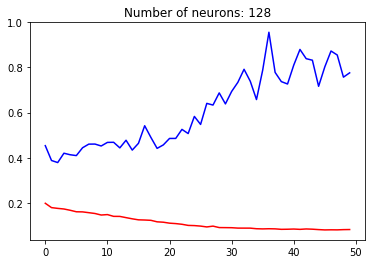

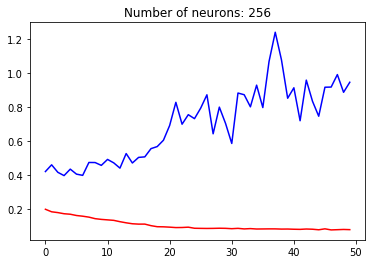

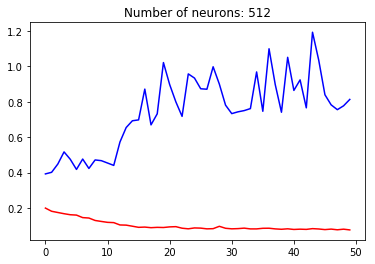

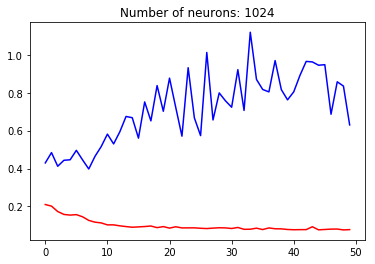

In [19]:
nb_models = len(models_info)
for nb_neurons, info_dict in models_info['models'].items():
    plt.plot(info_dict['loss'], 'r-')
    plt.plot(info_dict['val_loss'], 'b-')
    plt.title('Number of neurons: {}'.format(str(nb_neurons)))
    plt.show()

In [17]:
def dump_models_info(path, models_info):
    with open(path, 'w') as f:
        json.dump(models_info, f)
        
dump_models_info('models_one_layer_mse_adam.json', models_info)

In [22]:
models_info = {
    'models': {},
    'loss_function': 'mae',
    'optimizer': 'adam',
    'name': '1 Layer: {} neurons'
}

for i in range(p):
    info_dict = {}

    model = baseline_model(2**(i+1), input_dim, 'mean_absolute_error', 'adam')
    history = model.fit(X_train, y_train, batch_size=5, epochs=50, validation_data=(X_valid, y_valid), callbacks=[], verbose=1)
    info_dict['loss'] = history.history['loss']
    info_dict['val_loss'] = history.history['val_loss']
    
    info_dict['score'] = model.evaluate(X_test, y_test, batch_size=5)
    y_pred = model.predict(X_test)
    acc = []
    for tol in tolerances:
        y_tol = tol*y_train.flatten()
        accur = np.sum(np.abs(y_pred.flatten() - y_test.flatten()) <= tol) / len(y_test)
        acc.append(accur)
    info_dict['accuracies'] = acc
    models_info['models'][2**(i+1)] = info_dict
    
dump_models_info('models_one_layer_mae_adam.json', models_info)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 2)                 12        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train on 4338 samples, validate on 2169 samples
Epoch 1/50
4338/4338 [==============================] - 2s - loss: 0.2826 - val_loss: 0.5123
Epoch 2/50
4338/4338 [==============================] - 2s - loss: 0.2493 - val_loss: 0.5167
Epoch 3/50
4338/4338 [==============================] - 2s - loss: 0.2431 - val_loss: 0.5079
Epoch 4/50
4338/4338 [==============================] - 2s - loss: 0.2386 - val_loss: 0.5050
Epoch 5/50
4338/4338 [==============================] - 2s - loss: 0.2360 - val_loss: 0.5068
Epoch 6/50
4338/4338 [=======

Train on 4338 samples, validate on 2169 samples
Epoch 1/50
4338/4338 [==============================] - 4s - loss: 0.2624 - val_loss: 0.4932
Epoch 2/50
4338/4338 [==============================] - 2s - loss: 0.2351 - val_loss: 0.5198
Epoch 3/50
4338/4338 [==============================] - 2s - loss: 0.2312 - val_loss: 0.5018
Epoch 4/50
4338/4338 [==============================] - 2s - loss: 0.2295 - val_loss: 0.4906
Epoch 5/50
4338/4338 [==============================] - 2s - loss: 0.2289 - val_loss: 0.5029
Epoch 6/50
4338/4338 [==============================] - 2s - loss: 0.2277 - val_loss: 0.4845
Epoch 7/50
4338/4338 [==============================] - 2s - loss: 0.2272 - val_loss: 0.4963
Epoch 8/50
4338/4338 [==============================] - 2s - loss: 0.2260 - val_loss: 0.4837
Epoch 9/50
4338/4338 [==============================] - 2s - loss: 0.2264 - val_loss: 0.4966
Epoch 10/50
4338/4338 [==============================] - 2s - loss: 0.2252 - val_loss: 0.4914
Epoch 11/50
4338/4338

4338/4338 [==============================] - 2s - loss: 0.2320 - val_loss: 0.4795
Epoch 3/50
4338/4338 [==============================] - 2s - loss: 0.2287 - val_loss: 0.4833
Epoch 4/50
4338/4338 [==============================] - 2s - loss: 0.2255 - val_loss: 0.4808
Epoch 5/50
4338/4338 [==============================] - 2s - loss: 0.2257 - val_loss: 0.5052
Epoch 6/50
4338/4338 [==============================] - 2s - loss: 0.2238 - val_loss: 0.4859
Epoch 7/50
4338/4338 [==============================] - 2s - loss: 0.2227 - val_loss: 0.4891
Epoch 8/50
4338/4338 [==============================] - 2s - loss: 0.2232 - val_loss: 0.5187
Epoch 9/50
4338/4338 [==============================] - 2s - loss: 0.2226 - val_loss: 0.5025
Epoch 10/50
4338/4338 [==============================] - 2s - loss: 0.2215 - val_loss: 0.5058
Epoch 11/50
4338/4338 [==============================] - 2s - loss: 0.2207 - val_loss: 0.5166
Epoch 12/50
4338/4338 [==============================] - 2s - loss: 0.2200 - va

4338/4338 [==============================] - 2s - loss: 0.2110 - val_loss: 0.5047
Epoch 33/50
4338/4338 [==============================] - 2s - loss: 0.2123 - val_loss: 0.5307
Epoch 34/50
4338/4338 [==============================] - 2s - loss: 0.2118 - val_loss: 0.5132
Epoch 35/50
4338/4338 [==============================] - 2s - loss: 0.2117 - val_loss: 0.4998
Epoch 36/50
4338/4338 [==============================] - 2s - loss: 0.2109 - val_loss: 0.4899
Epoch 37/50
4338/4338 [==============================] - 2s - loss: 0.2101 - val_loss: 0.5100
Epoch 38/50
4338/4338 [==============================] - 2s - loss: 0.2103 - val_loss: 0.4991
Epoch 39/50
4338/4338 [==============================] - 2s - loss: 0.2098 - val_loss: 0.5064
Epoch 40/50
4338/4338 [==============================] - 2s - loss: 0.2091 - val_loss: 0.4997
Epoch 41/50
4338/4338 [==============================] - 2s - loss: 0.2082 - val_loss: 0.5046
Epoch 42/50
4338/4338 [==============================] - 2s - loss: 0.20

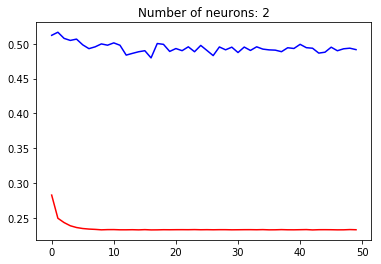

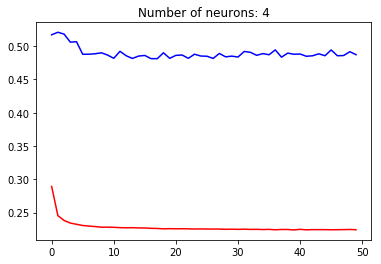

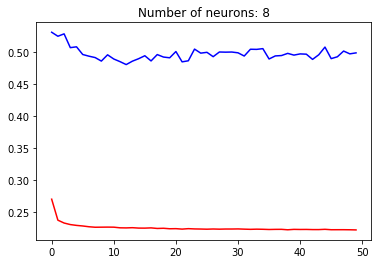

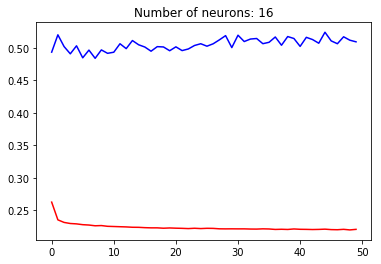

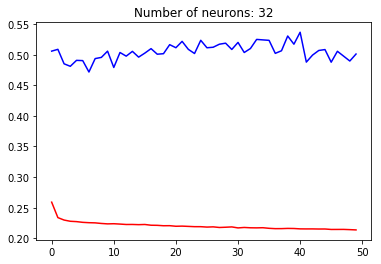

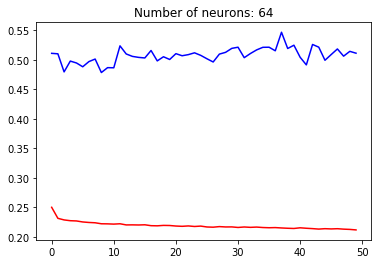

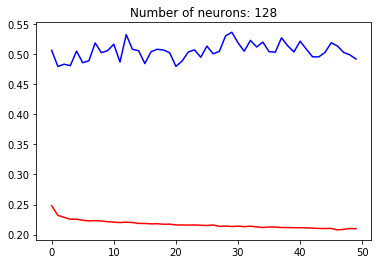

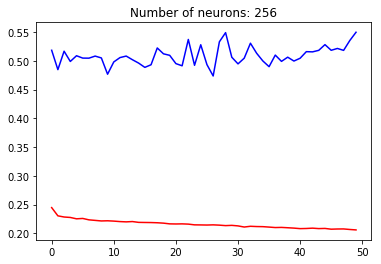

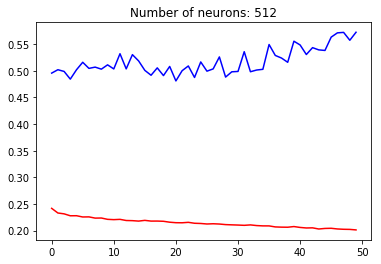

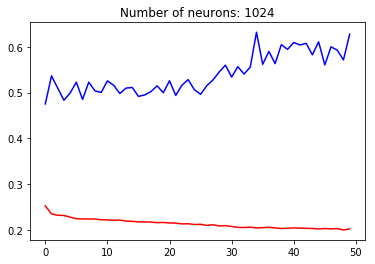

In [23]:
nb_models = len(models_info)
for nb_neurons, info_dict in models_info['models'].items():
    plt.plot(info_dict['loss'], 'r-')
    plt.plot(info_dict['val_loss'], 'b-')
    plt.title('Number of neurons: {}'.format(str(nb_neurons)))
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 2)                 12        
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train on 4338 samples, validate on 2169 samples
Epoch 1/50
4338/4338 [==============================] - 2s - loss: 0.2249 - val_loss: 0.4543
Epoch 2/50
4338/4338 [==============================] - 2s - loss: 0.2126 - val_loss: 0.4647
Epoch 3/50
4338/4338 [==============================] - 2s - loss: 0.2093 - val_loss: 0.4691
Epoch 4/50
4338/4338 [==============================] - 2s - loss: 0.2068 - val_loss: 0.4674
Epoch 5/50
4338/4338 [==============================] - 2s - loss: 0.2048 - val_loss: 0.4684
Epoch 6/50
4338/4338 [=======

Train on 4338 samples, validate on 2169 samples
Epoch 1/50
4338/4338 [==============================] - 3s - loss: 0.2109 - val_loss: 0.4912
Epoch 2/50
4338/4338 [==============================] - 2s - loss: 0.1985 - val_loss: 0.4826
Epoch 3/50
4338/4338 [==============================] - 2s - loss: 0.1951 - val_loss: 0.4860
Epoch 4/50
4338/4338 [==============================] - 2s - loss: 0.1931 - val_loss: 0.4835
Epoch 5/50
4338/4338 [==============================] - 1s - loss: 0.1919 - val_loss: 0.4775
Epoch 6/50
4338/4338 [==============================] - 2s - loss: 0.1909 - val_loss: 0.4733
Epoch 7/50
4338/4338 [==============================] - 2s - loss: 0.1901 - val_loss: 0.4730
Epoch 8/50
4338/4338 [==============================] - 2s - loss: 0.1894 - val_loss: 0.4723
Epoch 9/50
4338/4338 [==============================] - 2s - loss: 0.1887 - val_loss: 0.4716
Epoch 10/50
4338/4338 [==============================] - 2s - loss: 0.1881 - val_loss: 0.4675
Epoch 11/50
4338/4338

4338/4338 [==============================] - 2s - loss: 0.1832 - val_loss: 0.4635
Epoch 3/50
4338/4338 [==============================] - 2s - loss: 0.1795 - val_loss: 0.4479
Epoch 4/50
4338/4338 [==============================] - 2s - loss: 0.1772 - val_loss: 0.4283
Epoch 5/50
4338/4338 [==============================] - 2s - loss: 0.1754 - val_loss: 0.4161
Epoch 6/50
4338/4338 [==============================] - 2s - loss: 0.1738 - val_loss: 0.4232
Epoch 7/50
4338/4338 [==============================] - 2s - loss: 0.1724 - val_loss: 0.4202
Epoch 8/50
4338/4338 [==============================] - 2s - loss: 0.1716 - val_loss: 0.4153
Epoch 9/50
4338/4338 [==============================] - 2s - loss: 0.1707 - val_loss: 0.4152
Epoch 10/50
4338/4338 [==============================] - 2s - loss: 0.1700 - val_loss: 0.4223
Epoch 11/50
4338/4338 [==============================] - 2s - loss: 0.1691 - val_loss: 0.4029
Epoch 12/50
4338/4338 [==============================] - 2s - loss: 0.1684 - va

4338/4338 [==============================] - 2s - loss: 0.1484 - val_loss: 0.4335
Epoch 33/50
4338/4338 [==============================] - 2s - loss: 0.1480 - val_loss: 0.4345
Epoch 34/50
4338/4338 [==============================] - 2s - loss: 0.1475 - val_loss: 0.4380
Epoch 35/50
4338/4338 [==============================] - 2s - loss: 0.1469 - val_loss: 0.4410
Epoch 36/50
4338/4338 [==============================] - 2s - loss: 0.1466 - val_loss: 0.4391
Epoch 37/50
4338/4338 [==============================] - 2s - loss: 0.1461 - val_loss: 0.4391
Epoch 38/50
4338/4338 [==============================] - 2s - loss: 0.1456 - val_loss: 0.4460
Epoch 39/50
4338/4338 [==============================] - 2s - loss: 0.1452 - val_loss: 0.4388
Epoch 40/50
4338/4338 [==============================] - 2s - loss: 0.1447 - val_loss: 0.4383
Epoch 41/50
4338/4338 [==============================] - 2s - loss: 0.1445 - val_loss: 0.4386
Epoch 42/50
4338/4338 [==============================] - 2s - loss: 0.14

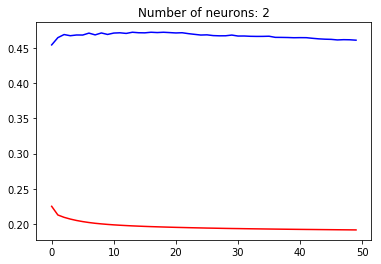

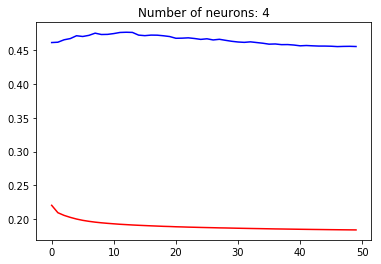

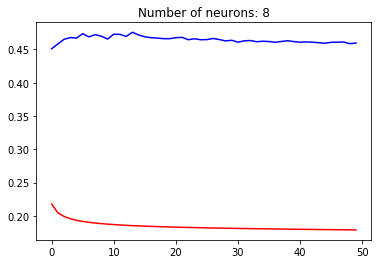

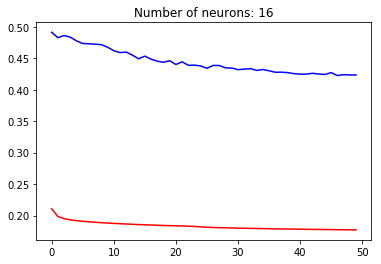

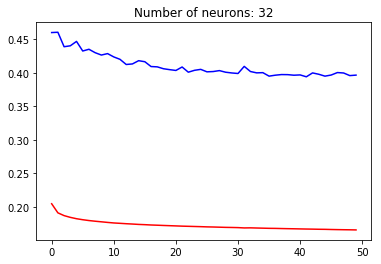

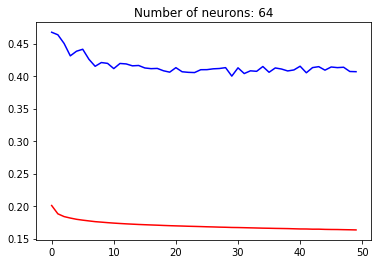

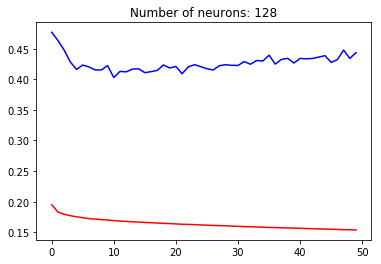

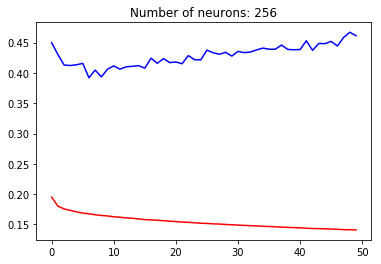

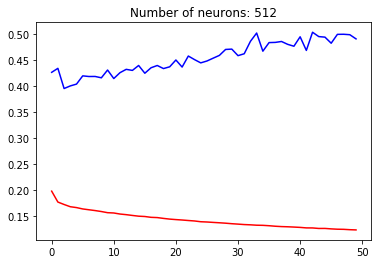

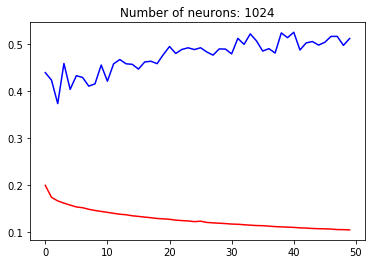

In [24]:
models_info = {
    'models': {},
    'loss_function': 'mae',
    'optimizer': 'adagrad',
    'name': '1 Layer: {} neurons'
}

for i in range(p):
    info_dict = {}

    model = baseline_model(2**(i+1), input_dim, 'mean_squared_error', 'adagrad')
    history = model.fit(X_train, y_train, batch_size=5, epochs=50, validation_data=(X_valid, y_valid), callbacks=[], verbose=1)
    info_dict['loss'] = history.history['loss']
    info_dict['val_loss'] = history.history['val_loss']
    
    info_dict['score'] = model.evaluate(X_test, y_test, batch_size=5)
    y_pred = model.predict(X_test)
    acc = []
    for tol in tolerances:
        y_tol = tol*y_train.flatten()
        accur = np.sum(np.abs(y_pred.flatten() - y_test.flatten()) <= tol) / len(y_test)
        acc.append(accur)
    info_dict['accuracies'] = acc
    models_info['models'][2**(i+1)] = info_dict
    
dump_models_info('models_one_layer_mae_adagrad.json', models_info)

nb_models = len(models_info)
for nb_neurons, info_dict in models_info['models'].items():
    plt.plot(info_dict['loss'], 'r-')
    plt.plot(info_dict['val_loss'], 'b-')
    plt.title('Number of neurons: {}'.format(str(nb_neurons)))
    plt.show()

In [32]:
model = baseline_model(64, input_dim, 'mean_squared_error', 'adagrad')
hist= model.fit(X_train, y_train, batch_size=5, epochs=200, validation_data=(X_valid, y_valid), callbacks=[], verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 65        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________
Train on 4338 samples, validate on 2169 samples
Epoch 1/200
4338/4338 [==============================] - 3s - loss: 0.1998 - val_loss: 0.4668
Epoch 2/200
4338/4338 [==============================] - 2s - loss: 0.1872 - val_loss: 0.4543
Epoch 3/200
4338/4338 [==============================] - 2s - loss: 0.1837 - val_loss: 0.4559
Epoch 4/200
4338/4338 [==============================] - 2s - loss: 0.1814 - val_loss: 0.4512
Epoch 5/200
4338/4338 [==============================] - 2s - loss: 0.1799 - val_loss: 0.4377
Epoch 6/200
4338/4338 

4338/4338 [==============================] - 1s - loss: 0.1537 - val_loss: 0.4636
Epoch 166/200
4338/4338 [==============================] - 1s - loss: 0.1536 - val_loss: 0.4634
Epoch 167/200
4338/4338 [==============================] - 1s - loss: 0.1535 - val_loss: 0.4655
Epoch 168/200
4338/4338 [==============================] - 1s - loss: 0.1535 - val_loss: 0.4684
Epoch 169/200
4338/4338 [==============================] - 1s - loss: 0.1534 - val_loss: 0.4647
Epoch 170/200
4338/4338 [==============================] - 1s - loss: 0.1533 - val_loss: 0.4661
Epoch 171/200
4338/4338 [==============================] - 1s - loss: 0.1531 - val_loss: 0.4706
Epoch 172/200
4338/4338 [==============================] - 1s - loss: 0.1532 - val_loss: 0.4672
Epoch 173/200
4338/4338 [==============================] - 1s - loss: 0.1531 - val_loss: 0.4650
Epoch 174/200
4338/4338 [==============================] - 1s - loss: 0.1531 - val_loss: 0.4632
Epoch 175/200
4338/4338 [=============================

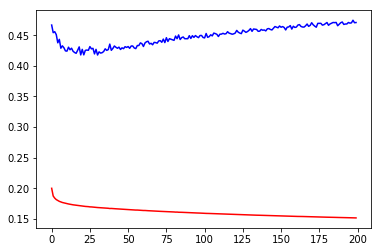

In [33]:
plt.plot(hist.history['loss'], 'r-')
plt.plot(hist.history['val_loss'], 'b-')

plt.show()

m

In [40]:
tolerances = np.linspace(0, 2, 10)

y_pred = model.predict(X_test)
acc = []
for tol in tolerances:
    y_tol = tol*y_train.flatten()
    accur = np.sum(np.abs(y_pred.flatten() - y_test.flatten()) <= tol) / len(y_test)
    acc.append(accur)

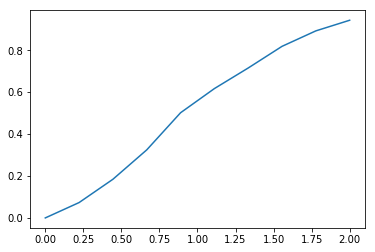

In [43]:
plt.plot(tolerances, acc)
plt.show()

In [42]:
acc


[0.0,
 0.073305670816044263,
 0.18441678192715538,
 0.32457353619179347,
 0.5016136468418626,
 0.61687413554633475,
 0.71507607192254496,
 0.81834946980175194,
 0.89211618257261416,
 0.94283079760258182]